# Data Creation ⛏

Tomer Erez

Gal Mishan

Tal Sadot

Shahar Dvir

In this notebook we will enrich the celeb-a dataset.

1. We will convert binary descriptions to textual in order to interface with modern text to image models.

2. We will predict the ages of each celeb and insert it to the dataset.

3. Create a final csv file with three columns: image_id, textual description, ages.

# Download the datasets ⬇

In [1]:
from google.colab import files
# files.upload()
!pip install -q kaggle

In [2]:
!git clone https://github.com/tomer-erez/deepLearningWorkShopFinalProject.git

Cloning into 'deepLearningWorkShopFinalProject'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 63 (delta 1), reused 2 (delta 0), pack-reused 57
Receiving objects: 100% (63/63), 49.46 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
!mkdir -p ~/.kaggle
# generated a kaggle api key
!cp /content/deepLearningWorkShopFinalProject/age_detection/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q /content/celeba-dataset.zip -d /content/celeba


 99% 1.32G/1.33G [00:14<00:00, 102MB/s] 
100% 1.33G/1.33G [00:14<00:00, 97.5MB/s]


# Loading the datasets

## images

In [4]:
# !du -sh /content/celeba/img_align_celeba/img_align_celeba


## Tabular datasets

In [5]:
import pandas as pd
attr = pd.read_csv("/content/celeba/list_attr_celeba.csv")
attr.head()


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
bbox =  pd.read_csv('/content/celeba/list_bbox_celeba.csv')
bbox.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [7]:
landmarks =  pd.read_csv('/content/celeba/list_landmarks_align_celeba.csv')
landmarks.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


# Enriching the dataset with figure's ages

we want to input our generative model the celeb's ages too. so we will download a network which predicts ages and use it.

In [8]:
# !pip install deepface
# from deepface import DeepFace
# import time

show how it works

In [9]:
# import cv2
# image_folder_path = '/content/celeba/img_align_celeba/img_align_celeba'
# sample_path= image_folder_path+'/080768.jpg'
# frame = cv2.imread(sample_path)
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# from PIL import Image
# Image.fromarray(frame)

confidence is zero because he is looking sideways. need to be carefull of those and filter by confidence

In [10]:
# st=time.time()
# obj = DeepFace.analyze(img_path = sample_path, actions = ['age'], enforce_detection=False)
# end=time.time()
# age=obj[0]["age"]
# conf = obj[0]["face_confidence"]

# print(f'age {age},conf {conf}')
# print(f'single prediction took {end-st}')

showing how age prediction works for a collage of images

In [11]:
# import os
# import matplotlib.pyplot as plt
# import cv2
# ROWS = 7
# COLS = 7
# STOP = ROWS * COLS
# fig, axs = plt.subplots(ROWS, COLS, figsize=(10, 10))  # Adjust the figsize as needed
# i = 0
# time_cnt=0
# for row in range(ROWS):
#     for col in range(COLS):
#         if i >= STOP:
#             break

#         image_path = os.listdir(image_folder_path)[i]
#         full_path = os.path.join(image_folder_path, image_path)
#         frame = cv2.imread(full_path)
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#         st=time.time()
#         obj = DeepFace.analyze(img_path = full_path, actions = ['age'], enforce_detection=False)
#         end=time.time()
#         time_cnt+=end-st

#         conf = obj[0]["face_confidence"]
#         age = obj[0]["age"]

#         # Display the image using Matplotlib
#         axs[row, col].imshow(frame)
#         axs[row, col].axis('off')
#         axs[row, col].set_title(f'age {age},conf {conf}', color='white', backgroundcolor='black', fontsize=10, loc='left', pad=2)  # Set the title with age message
#         i += 1

# end=time.time()
# print(f'prediction time per image {(time_cnt)/(STOP)}')
# plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the spacing between subplots
# plt.show()

In [12]:
# import time
# import numpy as np

# # Define constants

# MAX_IMAGE = 1000
# min_conf = 0.9

# # Get list of image paths
# image_folder_path='/content/celeba/img_align_celeba/img_align_celeba'
# images_dir = os.listdir(image_folder_path)[:MAX_IMAGE]

# # Initialize time counter
# time_cnt = 0

# # Initialize lists to store ages and confidences
# ages = []
# image_paths_list = []

# # Iterate over image paths
# for image_path in images_dir:
#     st = time.time()
#     full_path = os.path.join(image_folder_path, image_path)
#     obj = DeepFace.analyze(img_path=full_path, actions=['age'], enforce_detection=False)
#     conf = obj[0]["face_confidence"]
#     age = obj[0]["age"] if conf >= min_conf else 0

#     ages.append(age)
#     image_paths_list.append(image_path)

#     end = time.time()
#     time_cnt += end - st


# # Initialize DataFrame
# ages_df = pd.DataFrame(columns=['image_id', 'age'])
# # Add ages and confidences to DataFrame
# ages_df['image_id'] = image_paths_list
# ages_df['age'] = ages

# # Print average prediction time per image
# print(f'prediction time per image {(time_cnt) / (MAX_IMAGE)}')



In [13]:
#ages_df.head(max_images)

# Merging the tables based on the primary key image_id





In [14]:
import pandas as pd

# Assuming 'attr', 'bbox', 'landmarks', and 'df' DataFrames are already defined

# Merge attr, bbox, and landmarks DataFrames
df = pd.merge(pd.merge(attr, bbox, on="image_id"), landmarks, on="image_id")

# Left join with ages_df
print(df.columns)
print(df.shape)

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'x_1', 'y_1', 'width', 'height',
       'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y', 'nose_x',
       'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x', 'rightmouth_y'],
      dtype='object')
(202599, 55)


In [15]:
df.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,66,114,112,112,86,119,71,147,104,150


# creating textual data

## assesing the facial landmarks sizes'

In [16]:
import numpy as np

# Calculate distance between eyes
eye_distance = np.sqrt((df['righteye_x'] - df['lefteye_x'])**2 + (df['righteye_y'] - df['lefteye_y'])**2)
eye_distance /= df['width']

# calc nose width
nose_width = np.abs(df['leftmouth_x'] - df['rightmouth_x']) / df['width']

# calc nose height
nose_length = np.abs(df['nose_y'] - df['lefteye_y']) / df['height']


# Calculate mouth size
mouth_width = np.abs(df['leftmouth_x'] - df['rightmouth_x']) / df['width']
mouth_length = np.abs(df['leftmouth_y'] - df['rightmouth_y']) / df['height']



clean outliers

In [17]:
eye_distance[eye_distance>=1]=eye_distance.median()
eye_distance[eye_distance<=0]=eye_distance.median()

nose_width[nose_width>=1]=nose_width.median()
nose_width[nose_width<=0]=nose_width.median()

nose_length[nose_length>=1]=nose_length.median()
nose_length[nose_length<=0]=nose_length.median()

mouth_width[mouth_width>=1]=mouth_width.median()
mouth_width[mouth_width<=0]=mouth_width.median()

mouth_length[mouth_length>=1]=mouth_length.median()
mouth_length[mouth_length<=0]=mouth_length.median()

plot hist

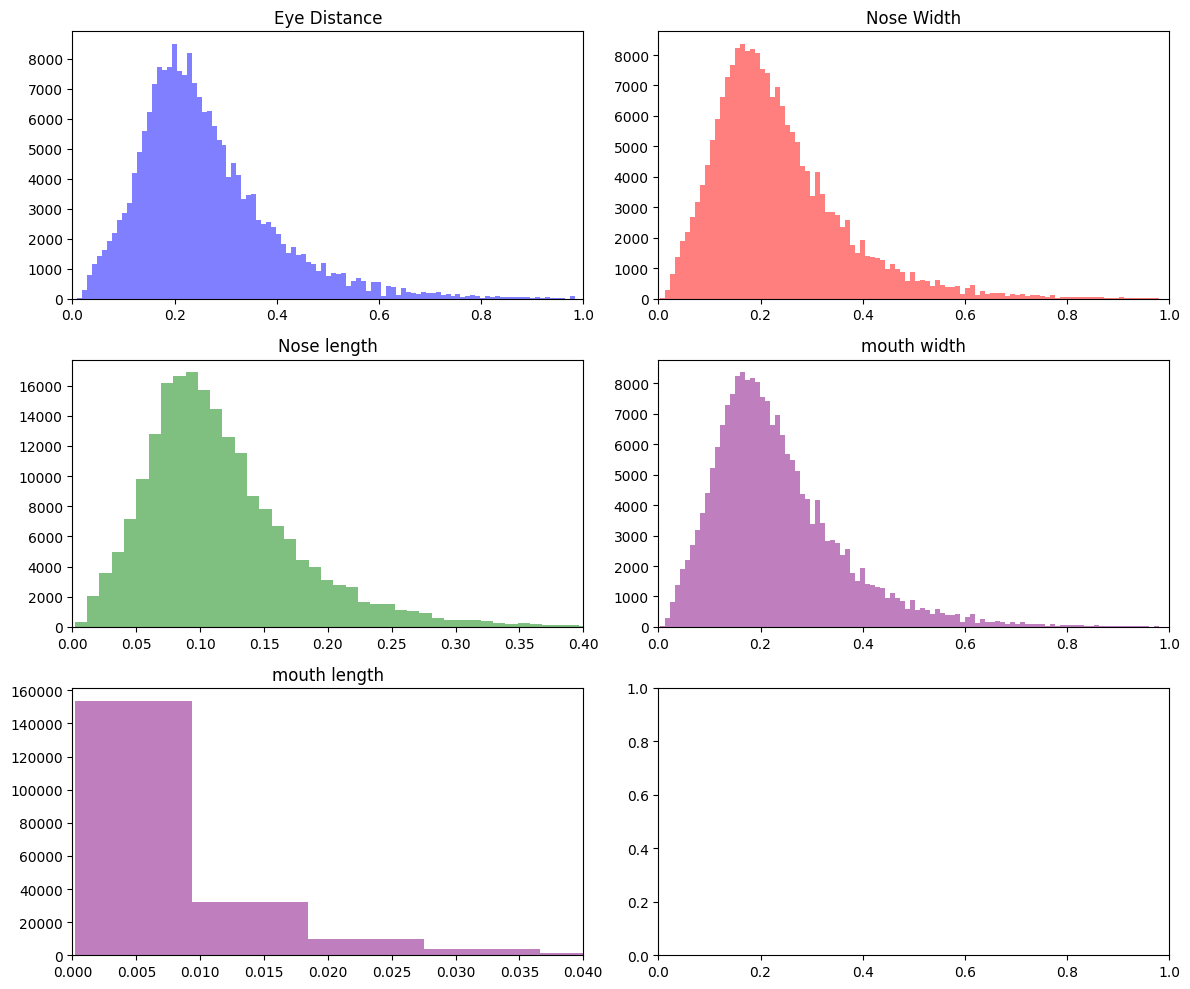

In [18]:
import matplotlib.pyplot as plt

# Create a figure with 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot eye distance histogram
axs[0, 0].hist(eye_distance, color='blue', alpha=0.5, bins=100)
axs[0, 0].set_title('Eye Distance')
axs[0, 0].set_xlim(0, 1)  # Set x-axis limit

# Plot nose width histogram
axs[0, 1].hist(nose_width, color='red', alpha=0.5, bins=100)
axs[0, 1].set_title('Nose Width')
axs[0, 1].set_xlim(0, 1)  # Set x-axis limit

# Plot nose height histogram
axs[1, 0].hist(nose_length, color='green', alpha=0.5, bins=100)
axs[1, 0].set_title('Nose length')
axs[1, 0].set_xlim(0, 0.4)  # Set x-axis limit

# Plot mouth size histogram
axs[1, 1].hist(mouth_width, color='purple', alpha=0.5, bins=100)
axs[1, 1].set_title('mouth width')
axs[1, 1].set_xlim(0, 1)  # Set x-axis limit

# Plot mouth size histogram
axs[2, 0].hist(mouth_length, color='purple', alpha=0.5, bins=100)
axs[2, 0].set_title('mouth length')
axs[2, 0].set_xlim(0, 0.04)  # Set x-axis limit

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


iqr

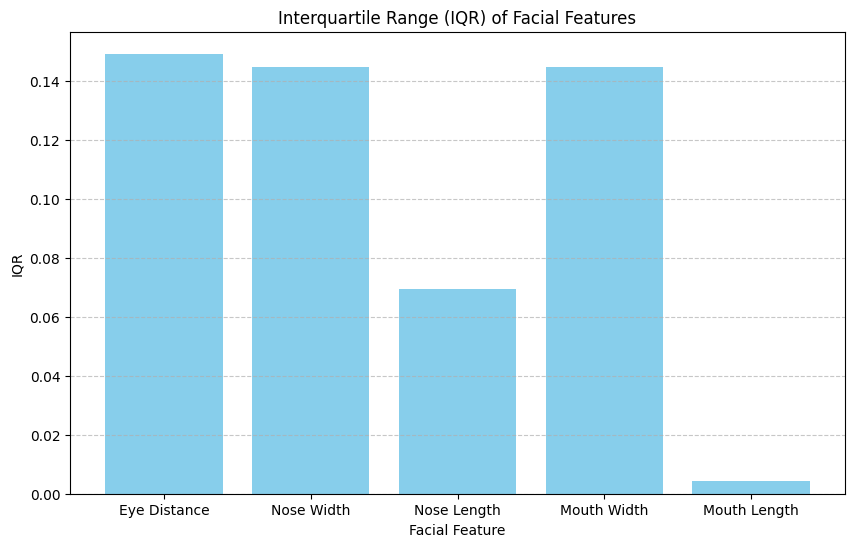

In [19]:
# Calculate IQR for each sequence
eye_distance_iqr = np.percentile(eye_distance, 75) - np.percentile(eye_distance, 25)
nose_width_iqr = np.percentile(nose_width, 75) - np.percentile(nose_width, 25)
nose_length_iqr = np.percentile(nose_length, 75) - np.percentile(nose_length, 25)
mouth_width_iqr = np.percentile(mouth_width, 75) - np.percentile(mouth_width, 25)
mouth_length_iqr = np.percentile(mouth_length, 75) - np.percentile(mouth_length, 25)

# Plotting
attributes = ['Eye Distance', 'Nose Width', 'Nose Length', 'Mouth Width', 'Mouth Length']
iqr_values = [eye_distance_iqr, nose_width_iqr, nose_length_iqr, mouth_width_iqr, mouth_length_iqr]

plt.figure(figsize=(10, 6))
plt.bar(attributes, iqr_values, color='skyblue')
plt.title('Interquartile Range (IQR) of Facial Features')
plt.xlabel('Facial Feature')
plt.ylabel('IQR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

create two vectos, for the below and above iqr as we want to save large and small facial landmarks as 1s and report to the generative model, rest is zero.

In [20]:
def create_vector_for_feature(vector):
    # Calculate percentiles
    percentile_25 = np.percentile(vector, 25)
    percentile_75 = np.percentile(vector, 75)

    # Create vector
    below_25_percentile = np.where(vector < percentile_25, 1, -1)
    above_75_percentile = np.where(vector > percentile_75, 1, -1)

    return below_25_percentile, above_75_percentile

In [21]:
# Assuming df is your DataFrame
df['short_nose'], df['long_nose'] = create_vector_for_feature(nose_length)
df['thin_nose'], df['wide_nose'] = create_vector_for_feature(nose_width)
df['eyes_close_to_each_other'], df['distant_eyes'] = create_vector_for_feature(eye_distance)
df['narrow_mouth'], df['wide_mouth'] = create_vector_for_feature(mouth_width)


## creating attributes dict

In [22]:
df.rename(columns={'5_o_Clock_Shadow': 'stubble_beard'}, inplace=True)
df.rename(columns={'No_Beard': 'bearded'}, inplace=True)

# Replace 1s with 0s and -1s with 1s in the 'bearded' column
df['bearded'].replace({1: 10, -1: -10}, inplace=True)
df['bearded'].replace({10: -1, -10: 1}, inplace=True)

In [23]:
# Create a dictionary with attributes and their values
ATTRIBUTES = {
    'IsAttributes': ['Attractive', 'Bald', 'Chubby', 'Young', 'Smiling', 'bearded'],
    'HasAttributes': ['Eyeglasses', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair',
               'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Double_Chin', 'Goatee', 'Gray_Hair', 'Straight_Hair',
               'Sideburns', 'Rosy_Cheeks', 'Receding_Hairline', 'Pointy_Nose', 'Pale_Skin', 'Oval_Face', 'Narrow_Eyes',
               'Mustache', 'Mouth_Slightly_Open', 'High_Cheekbones', 'Wavy_Hair',
                'long_nose', 'short_nose', 'wide_nose','thin_nose','distant_eyes', 'wide_mouth' , 'narrow_mouth',
                "stubble_beard"],

    'WearAttributes': ['Wearing_Necktie', 'Wearing_Necklace', 'Wearing_Lipstick', 'Wearing_Hat', 'Wearing_Earrings',
                'Heavy_Makeup']
}

## creating the new dataset

In [24]:
celebA_sentences_df = pd.DataFrame(columns=['image_id', 'desc'])# add ages

In [25]:
import time
start = time.time()
# a function to generate the prompt for each row
def generate_prompt(row):
    prompt = 'male person. ' if row['Male'] == 1 else 'female person. '

    # # Add age if available
    # if not pd.isnull(row['age']) and row['age']!=0:
    #     prompt += f"Age: {int(row['age'])}. "

    # Check IsAttributes
    is_attributes = [attr + ". " for attr in ATTRIBUTES["IsAttributes"] if row[attr] == 1]
    # Check HasAttributes
    has_attributes = [attr.replace('_', ' ') + ". " for attr in ATTRIBUTES["HasAttributes"] if row[attr] == 1]
    # Check WearAttributes
    wear_attributes = [attr.split('_')[1] + ". " for attr in ATTRIBUTES["WearAttributes"] if row[attr] == 1]


    # Combine all the attributes
    prompt += " ".join(is_attributes + has_attributes + wear_attributes)

    return prompt

# Apply the function across rows of the DataFrame
descriptions = df.apply(generate_prompt, axis=1)

# Create a DataFrame from the descriptions
celebA_sentences_df = pd.DataFrame({'image_id': df['image_id'], 'desc': descriptions})


end = time.time()
# should be about 35 seconds
print(f'it took {end - start} seconds')


it took 34.2898313999176 seconds


In [26]:
celebA_sentences_df.head(5)

,image_id,desc
0,000001.jpg,female person. Attractive. Young. Smiling. ...
1,000002.jpg,female person. Young. Smiling. Bags Under Ey...
2,000003.jpg,male person. Young. Big Lips. Pointy Nose. ...
3,000004.jpg,female person. Attractive. Young. Straight H...
4,000005.jpg,female person. Attractive. Young. Arched Eye...


In [27]:
celebA_sentences_df.shape

(202599, 2)

In [28]:
# save the dataset
celebA_sentences_df.to_csv('/content/celebA_sentences_df.csv')

________________________________________________________________________________

In [29]:
attr.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

Attributes that can imply the size of mouth/eyes/nose:<br>
Big_Lips<br>
Big_Nose<br>
Mouth_Slightly_Open<br>
Narrow_Eyes<br>
Pointy_Nose<br>